#### We should ideally split the dataset into training and testing and then apply the outlier engineering techniques onto the training set, because we want to keep the test set untouched until the very end.

#### We'll want see how such a model performs on unseen data which may or may not contain outliers

#### But here, we'll assume that the entire data we have is our train set, and that we have a separate test set waiting for us

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
ca = fetch_california_housing()

In [3]:
dir(ca)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
X = ca.data

In [5]:
y = ca.target

In [6]:
data = np.concatenate((X,y.reshape(-1,1)), axis=1)

In [7]:
df = pd.DataFrame(data, columns=ca.feature_names+['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [9]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',]
features

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

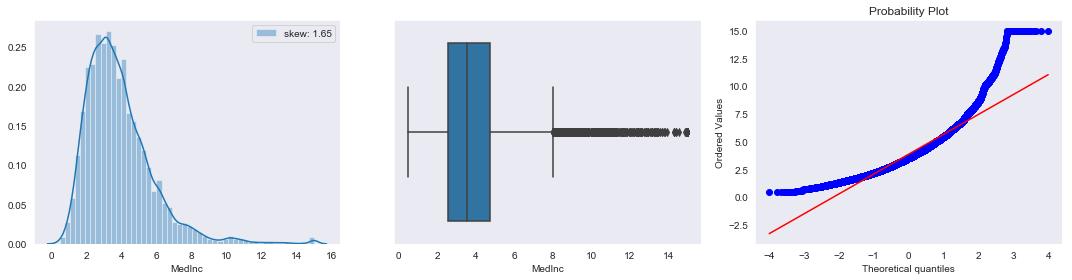

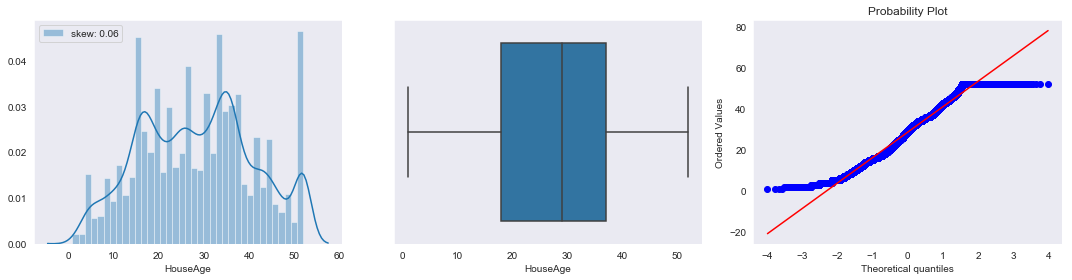

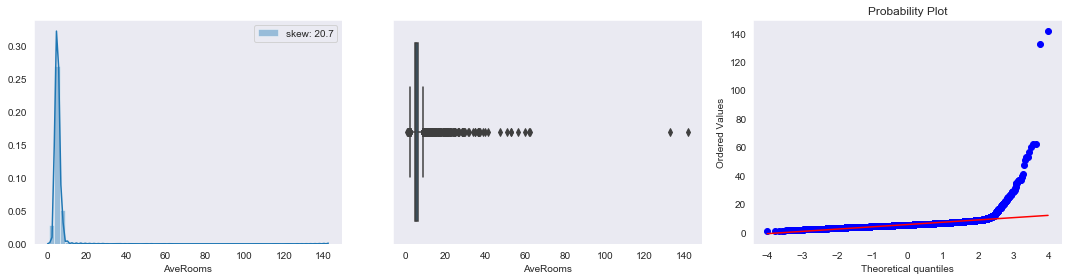

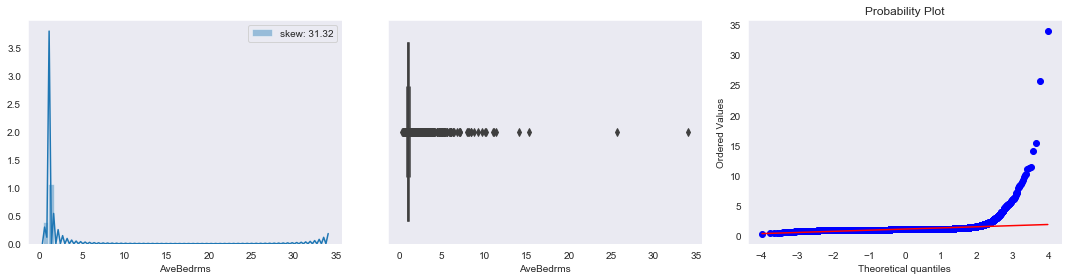

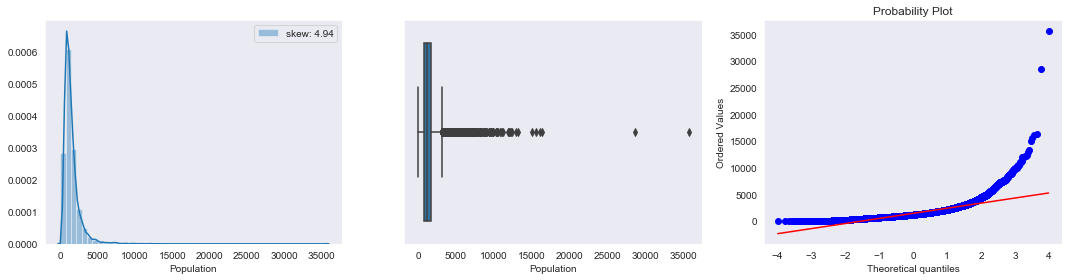

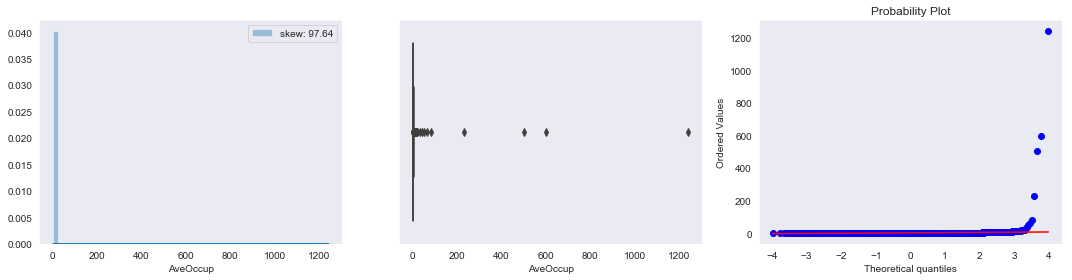

In [10]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

#### The method of using Z scores for capping/ trimming the outliers is valid ONLY if the particular feature is normally distributed

#### Since our data here is NOT normally distributed, we should use other techniques, one of which is this IQR method

# Capping using IQR method

In [11]:
df_cap = df.copy()

In [12]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [13]:
iqr_capping(df_cap, features, 1.5)

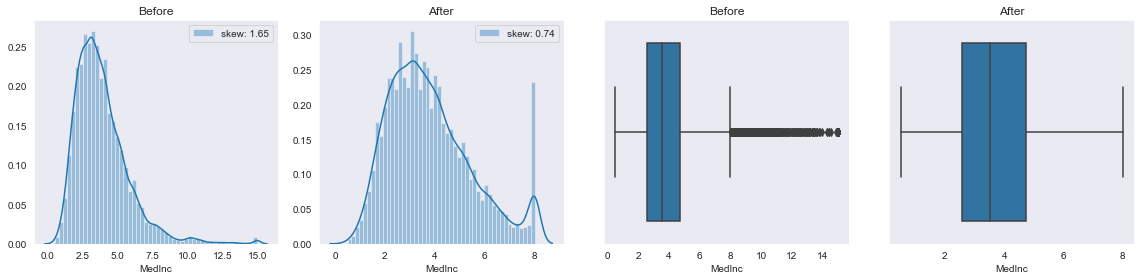

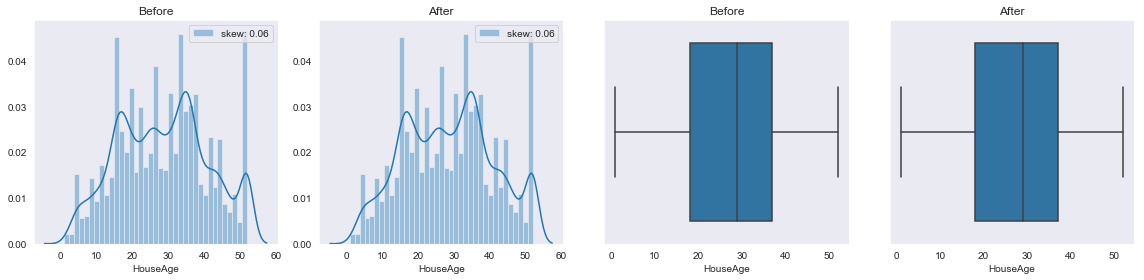

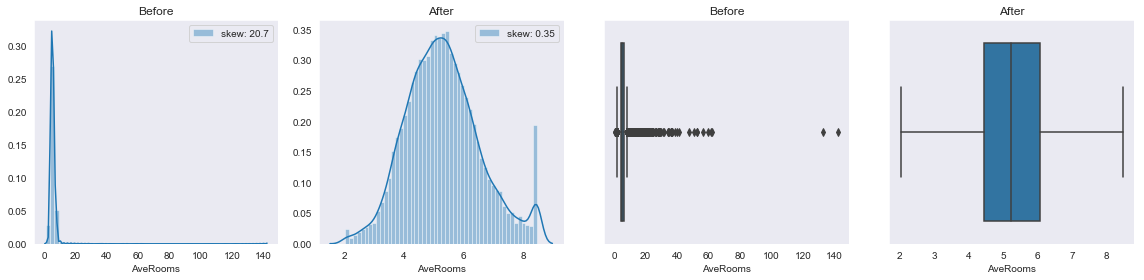

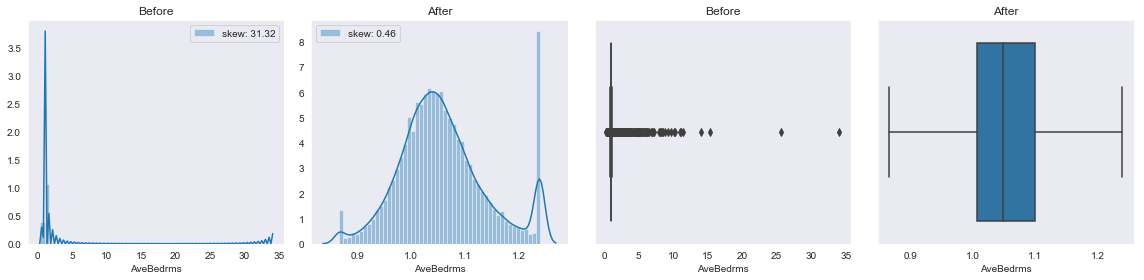

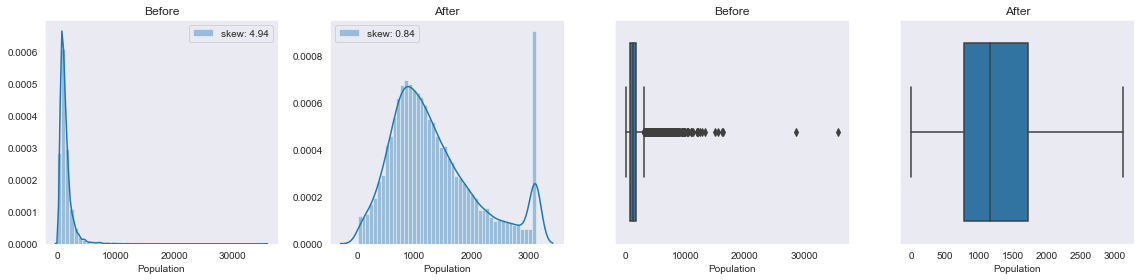

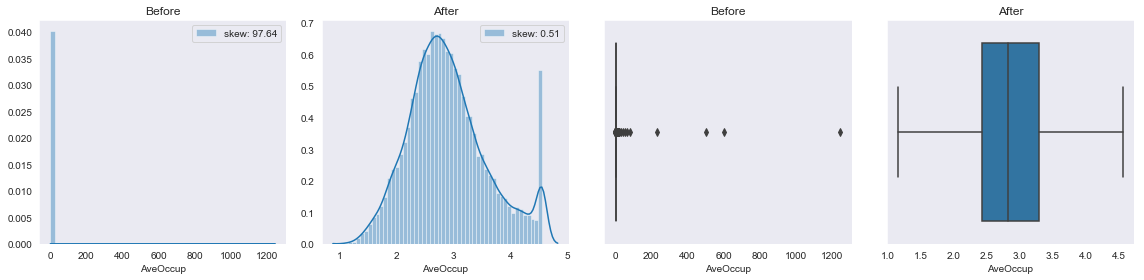

In [14]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Trimming using IQR method

In [34]:
df_trim = df.copy()

In [35]:
def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [36]:
s = df['Population']
s[(s > 3000) | (s<20)].index

Int64Index([   73,    95,   185,   283,   460,   485,   508,   536,   538,
              570,
            ...
            20527, 20529, 20530, 20539, 20543, 20544, 20563, 20567, 20604,
            20629],
           dtype='int64', length=1381)

In [37]:
dropped = np.unique(iqr_trimming(df_trim, features, 1.5))

In [38]:
df_trim.drop(dropped, inplace=True)

In [39]:
df_trim.shape

(16842, 7)

In [40]:
df.shape

(20640, 7)

In [41]:
20640-16842

3798

In [43]:
3798/20640

0.18401162790697675

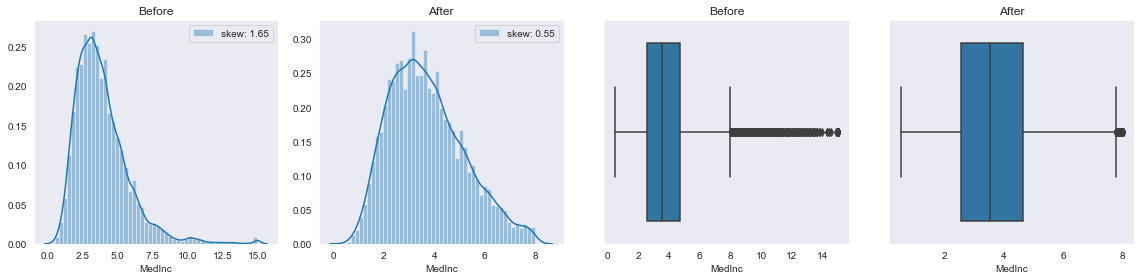

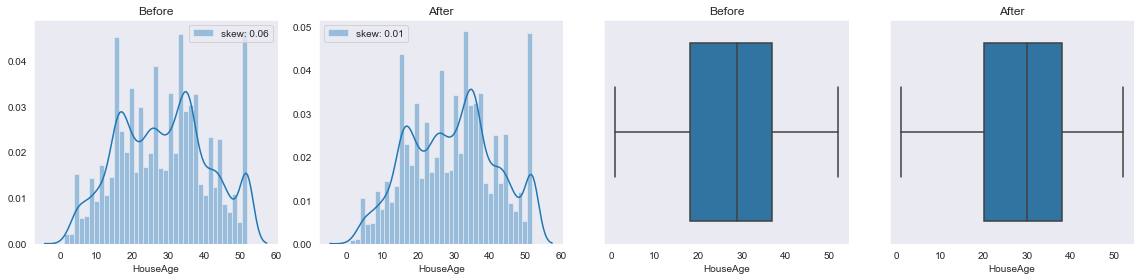

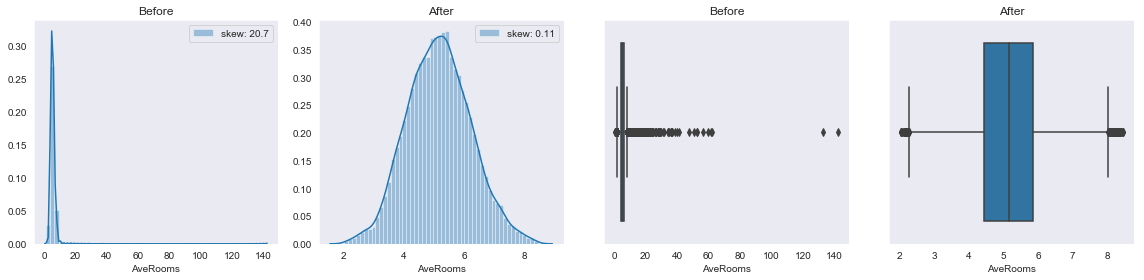

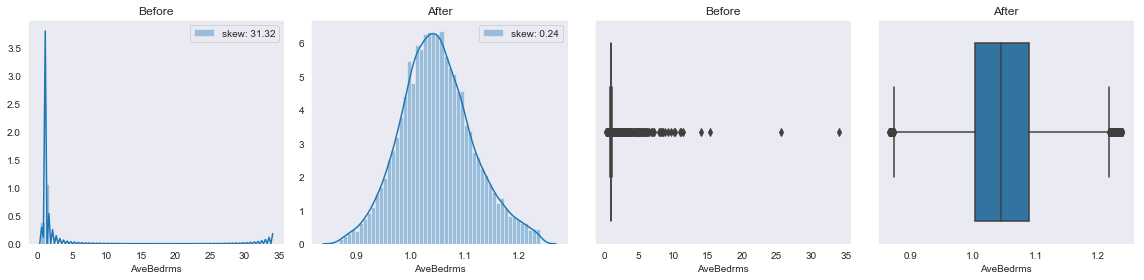

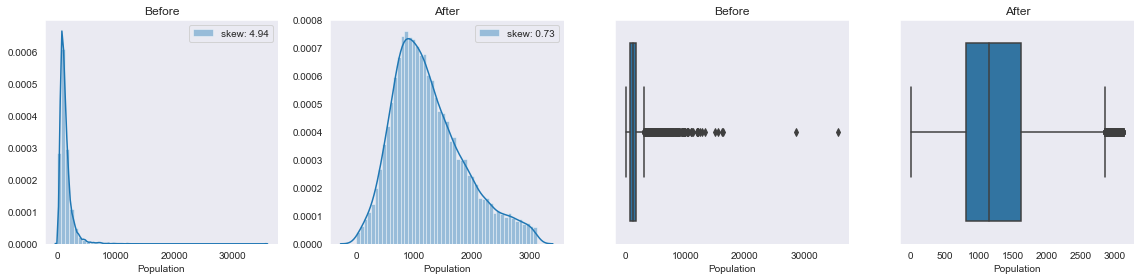

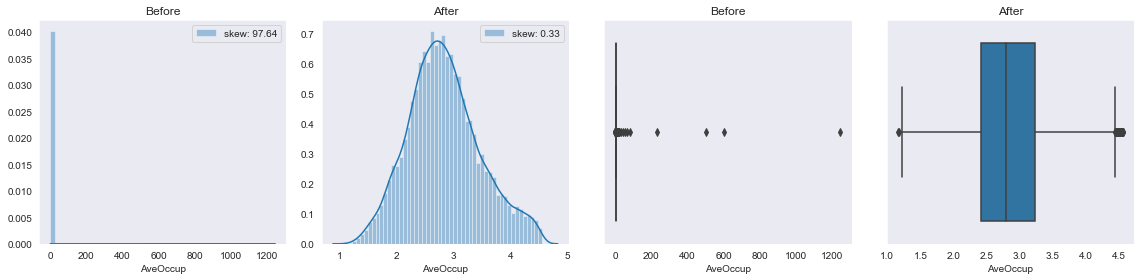

In [44]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()